## <데이터 전처리>
#### 데이터 인코딩(data encoding)
- 레이블 인코딩(문자->숫자) :LabelEncoder()
- 원-핫 인코딩:OneHotEncoder()
#### 피처 스케일링(Scaling)
- 표준화: StandardScaler()
- 정규화: MinMaxScaler()

##### LabelEncoder() : 문자 -> 숫자 (ML 알고리즘이 문자 인식을 못할 경우 사용)
- 1) encoder=LabelEncoder() :인코더를 객체로 생성
- 2) .fit(), .transform()으로 레이블 인코딩 수행 cf.디코딩은 .inverse_transform()

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

In [5]:
#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행

encoder=LabelEncoder()
#.fit()
encoder.fit(items)
#.transform()
encoder.transform(items)  #알아서 문자->숫자로 변경됨.

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [6]:
print("인코딩 클래스: ", encoder.classes_) #0,1,2,3,4,5에 대응하는 것

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [7]:
#디코딩: .inverse_transform()
print("디코딩 원본 값: ", encoder.inverse_transform([4,5,2,0,1,1,3,3])) #숫자->문자

디코딩 원본 값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


##### OneHotEncoder() : 숫자형-> 해당하는 것만 1 나머지는 0으로 인코딩 = pd.get_dummies(df)
- [주의] 1)숫자형이면서 2)2차원데이터만 입력가능
- 1) encoder=OneHotEncoder() :인코더를 객체로 생성
- 2) .fit(), .transform()으로 원핫 인코딩 수행 
- 3) 생성후 .toarray()를 통해 결과보기

In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [9]:
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder=LabelEncoder()
encoder.fit(items)
label = encoder.transform(items)
labels = label.reshape(-1,1) #2차원 데이터 변형

labels #바로 이 'labels'를 입력인자로 들어가게 할 것임.

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]], dtype=int64)

In [10]:
#원-핫 인코딩 적용- fit과 transform

#객체
oh_encoder = OneHotEncoder()
#.fit
oh_encoder.fit(labels)
#.transform
oh_label = oh_encoder.transform(labels)

print(oh_label) #이것만 보면 뭔지 잘 모르니까

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
type(oh_label)

scipy.sparse.csr.csr_matrix

In [12]:
print("\n원-핫 인코딩 데이터")
print(oh_label.toarray()) #toarray를 적용!
print("\n원-핫 인코딩 차원")
print(oh_label.shape)


원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

원-핫 인코딩 차원
(8, 6)


In [10]:
#판다스로 한번에 원-핫 인코딩하기(숫자형으로 변환할 필요도 없음!)
import pandas as pd

df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링(Feature scaling)- 표준화(StandardScaler), 정규화(MinMaxScaler)

##### StandardScaler(표준화)
- 개별 피처를 평균이 0, 분산이 1인 정규분포를 따르도록 변환해줌.(모든 값이 -1과 1 사이의 값으로 바뀐다는 뜻)
- 1) 객체생성 scaler=StandardScaler()
- 2) .fit()
- 3) .transform()

In [11]:
from sklearn.datasets import load_iris
import pandas as pd

In [12]:
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(iris_data, columns=iris.feature_names) #data값만 있음.
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
print("feature들의 평균값")
print(iris_df.mean())
print("\nfeature들의 분산값")
print(iris_df.var()) #평균, 분산 값이 컬럼별로 표준화되어 있지 않죠? 들쭉날쭉함.

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [14]:
#StandardScaler를 이용해 각 피처를 한 번에 표준화해 봅시다!
from sklearn.preprocessing import StandardScaler

In [15]:
#객체
scaler=StandardScaler()
#fit, transform 메서드를 활용해 데이터셋 변환
scaler.fit(iris_df)
scaler.transform(iris_df)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
iris_scaled=scaler.transform(iris_df)
iris_scaled_df=pd.DataFrame(iris_scaled,columns=iris.feature_names)
iris_scaled_df.head() #변환된 iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
#그럼 이제 컬럼별 평균, 분산값이 달라졌을까?
print("feature들의 평균값")
print(iris_scaled_df.mean())
print("\nfeature들의 분산값")
print(iris_scaled_df.var())
#오, 평균은 0에 가깝고 분산은 1에 모두 가까워졌어요~

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


##### MinMaxScaler(정규화)
- 데이터값을 0과 1 사이의 값으로 변환함.
- 데이터 분포가 정규분포 따르지 않을 때 적용
- 1) 객체
- 2) .fit(), .transform()

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
#객체
scaler=MinMaxScaler()
#fit, transform 메서드 활용해 데이터셋 변환
scaler.fit(iris_df)
scaler.transform(iris_df)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [20]:
#transform() 시 스케일 변환된 데이터셋은 numpy ndarray, 이를 df 반환
iris_scaled=scaler.transform(iris_df)
iris_scaled_df=pd.DataFrame(iris_scaled,columns=iris.feature_names)
iris_scaled_df.head() #변환된 iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [21]:
print("feature들의 평균값")
print(iris_scaled_df.mean())
print("\nfeature들의 분산값")
print(iris_scaled_df.var())
#minmaxscaler는 컬럼별 평균, 분산을 같게 만들어 주는 것은 아니고, 그저 0-1 사이 값으로 변환시켜주는 것임.

feature들의 평균값
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

feature들의 분산값
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


In [22]:
#그러니 최소, 최댓값을 살펴보면 0과 1로 나옴을 알 수 있음!
print("feature들의 최솟값")
print(iris_scaled_df.min())
print("\nfeature들의 최댓값")
print(iris_scaled_df.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 타이타닉 데이터를 이용한 타이타닉 생존자 예측(실습)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('01/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#결측값 처리
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
#categorical한 칼럼으로 value_counts()
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [11]:
df.Cabin.value_counts() #앞문자만 추출하도록 하자. 두세개가 섞여들어간 게 많군?

N              687
C23 C25 C27      4
B96 B98          4
G6               4
D                3
F33              3
E101             3
C22 C26          3
F2               3
B20              2
D36              2
B77              2
E24              2
C124             2
C125             2
E121             2
F G73            2
B51 B53 B55      2
E25              2
C92              2
B35              2
C93              2
E33              2
B58 B60          2
C123             2
F4               2
D35              2
B5               2
D26              2
B28              2
              ... 
B94              1
D30              1
E63              1
B71              1
C50              1
A31              1
A23              1
B79              1
D9               1
A16              1
C148             1
A24              1
D49              1
C95              1
D45              1
E40              1
C99              1
C70              1
A5               1
C106             1
B102             1
A20         

In [12]:
#가장 첫번째 이니셜 알파벳만 가져오기
df['Cabin']=df['Cabin'].str[:1] #astype이 아니라 그냥 .str 하면 문자 변환됨
df.Cabin.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [13]:
df.head() #'Cabin' 컬럼 바뀜

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


###### 무엇이 생존에 영향을 미쳤을까? (성별, 부, 나이, sibsp, parch) :그룹바이를 시켜야 하기 때문에 범주형만 가능!
##### 1) 성별에 따른 생존자 수 비교

In [14]:
#성별 기준으로 groupby
df.groupby(by=['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,314,314,314,314,314,314,314
male,577,577,577,577,577,577,577,577,577,577,577


In [15]:
df.groupby(by=['Sex','Survived']).count() #count 함수를 썼으므로 모든 컬럼에서 수가 동일하게 나옴. 보기 불편하므로 1개 칼럼만 떼보자

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   81     81     81      81    81   
       1                 233     233   233  233    233    233     233   233   
male   0                 468     468   468  468    468    468     468   468   
       1                 109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0            81        81  
       1           233       233  
male   0           468       468  
       1           109       109

In [16]:
df.groupby(['Sex','Survived'])['Survived'].count() #0:사망, 1:생존

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

##### 시각화 : sns.barplot(x,y, data=..)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


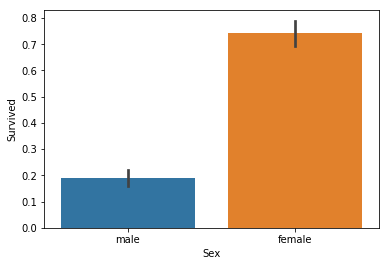

In [17]:
sns.barplot('Sex','Survived', data=df) #생존 비율로 나타냄.(여: 74.2% 남:18.8%)

##### 2) pclass에 따른 생존자 수 비교

In [18]:
df.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   80     80     80      80    80   
       1                 136   136  136  136    136    136     136   136   
2      0                  97    97   97   97     97     97      97    97   
       1                  87    87   87   87     87     87      87    87   
3      0                 372   372  372  372    372    372     372   372   
       1                 119   119  119  119    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            80        80  
       1           136       136  
2      0            97        97  
       1            87        87  
3      0           372       372  
       1           119       119

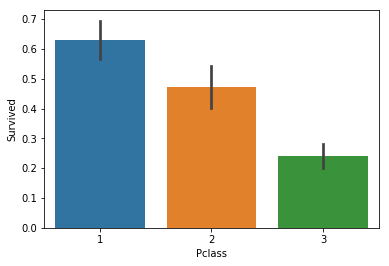

In [19]:
sns.barplot('Pclass','Survived',data=df) #생존 비율!!

###### sex, pclass 섞어서

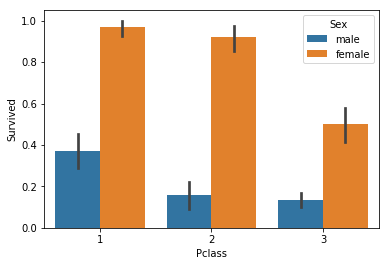

In [20]:
sns.barplot('Pclass','Survived',hue='Sex',data=df)

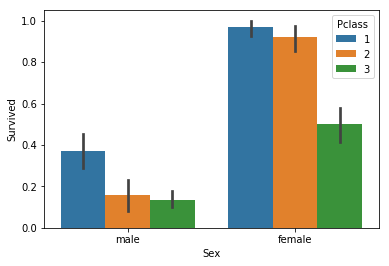

In [21]:
sns.barplot('Sex','Survived',hue='Pclass',data=df)

##### 3) 나이에 따라

In [22]:
#age category 나누기_ get_category 함수는 age를 인자로 받아 cat을 반환.
def get_category(age):
    cat=' '
    if age <= -1  : cat='unknwon'
    elif age <=5 : cat='Baby'
    elif age <=12 : cat='Child'
    elif age <=18: cat='Teenager'
    elif age <=25: cat='Student'
    elif age <=35: cat='Young-Adult'
    elif age <=60: cat='Adult'
    else:
        cat='Elderly'
    return cat

In [23]:
df.dtypes #오류주의) 만일 age가 object로 되어있으면 위의 함수가 적용이 안되므로 int/float로 바꿔주기

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
df['Age_Cat']=df['Age'].apply(get_category)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young-Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young-Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young-Adult


- plt.figure(figsize=(10,6)) 
- 그림사이즈. 그러나 plot 그릴때와 같은 창에서 실행시켜야 함

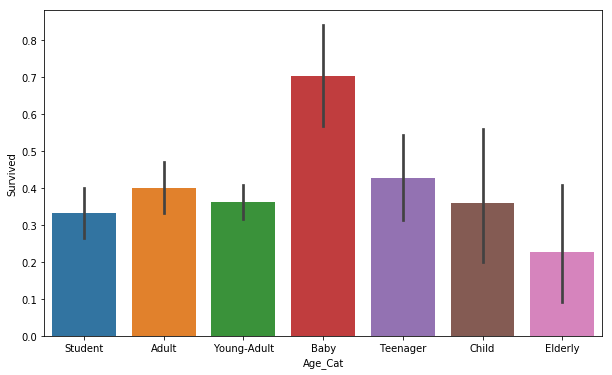

In [25]:
plt.figure(figsize=(10,6))
sns.barplot('Age_Cat','Survived',data=df) #x축의 순서가 다름. 직접 순서를 설정해주고 싶다면 order 옵션 설정해주자.

In [26]:
#x축 이름 정렬을 위해 그룹네임 설정
group_name=['unknwon','Baby','Child','Teenager','Student','Young-Adult','Adult','Elderly']

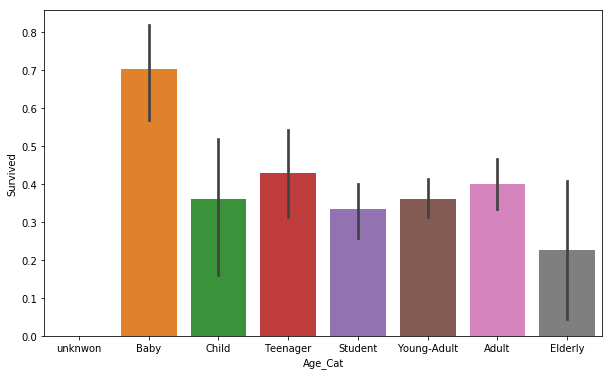

In [27]:
plt.figure(figsize=(10,6))
sns.barplot('Age_Cat','Survived',data=df,order=group_name)

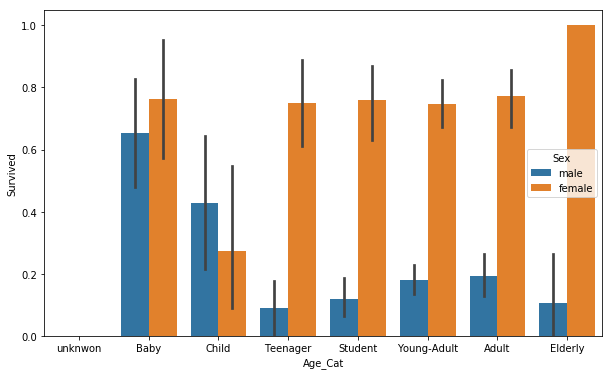

In [28]:
#섞어서
plt.figure(figsize=(10,6))
sns.barplot('Age_Cat','Survived',hue='Sex',data=df,order=group_name)

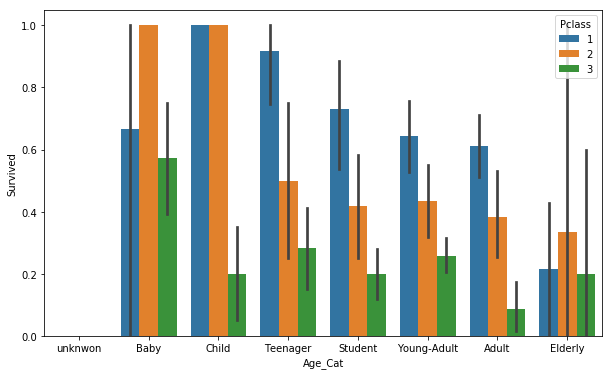

In [29]:
#섞어서
plt.figure(figsize=(10,6))
sns.barplot('Age_Cat','Survived',hue='Pclass',data=df,order=group_name)

#### sibsp, parch에 따라?

In [33]:
df.groupby(by=['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


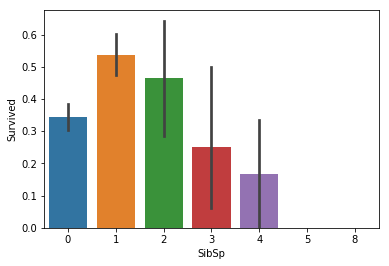

In [34]:
sns.barplot('SibSp','Survived',data=df)

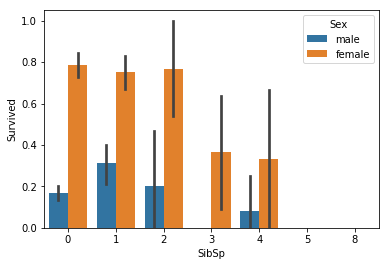

In [35]:
sns.barplot('SibSp','Survived',hue='Sex',data=df)

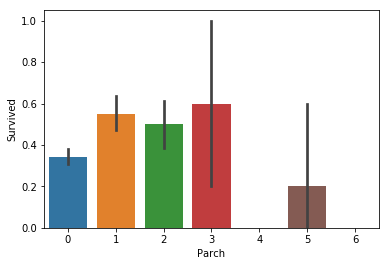

In [36]:
sns.barplot('Parch','Survived',data=df)

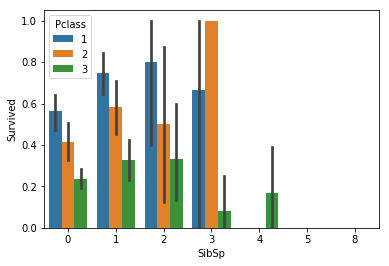

In [39]:
sns.barplot('SibSp','Survived',hue='Pclass',data=df)

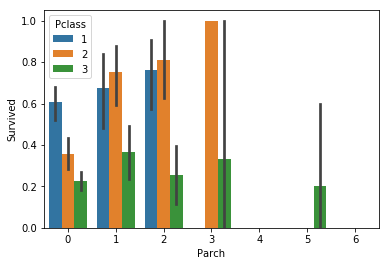

In [38]:
sns.barplot('Parch','Survived',hue='Pclass',data=df)

##### 레이블인코더를 통해 문자->숫자로 변경!

In [41]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age_Cat         object
dtype: object

In [44]:
#레이블 인코딩(문자->숫자. 3개변수에 대해(sex,cabin,embarked))
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [46]:
label=LabelEncoder()
label.fit(df['Sex'])
df['Sex']=label.transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young-Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,Young-Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S,Young-Adult


In [47]:
def encode_features(df):
    features=['Cabin','Sex','Embarked']
    for i in features:
        le=LabelEncoder()
        le=le.fit(df[i])
        df[i]=le.transform(df[i])
    return df

In [48]:
new_df=encode_features(df)
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young-Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young-Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young-Adult


In [65]:
new_df.Cabin.unique()

array([7, 2, 4, 6, 3, 0, 1, 5, 8], dtype=int64)